<a href="https://colab.research.google.com/github/PratyushSinha8/customer_churn_prediction/blob/main/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [8]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Removing customerid and Surname because no use
df.drop(labels=['CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
#Checking column types

df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
#Coverting Gender values to 1s and 0s

df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [21]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [24]:
#One Hot Encoding required for Geography
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df1=pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [26]:
df1.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [32]:
cols_to_scale=['CreditScore', 'Age', 'Tenure', 'Balance', 'RowNumber', 'NumOfProducts', 'EstimatedSalary']
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df1[cols_to_scale]= scaler.fit_transform(df1[cols_to_scale])

In [33]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

RowNumber: [0.00000000e+00 1.00010001e-04 2.00020002e-04 ... 9.99799980e-01
 9.99899990e-01 1.00000000e+00]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.32

In [46]:
#The Data is ready for the training
#Train Test Split
X=df1.drop(labels=['Exited'], axis=1)
Y=df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=5)

In [37]:
X_train[:10]

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.775178,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.415442,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.388139,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.923892,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.521052,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.748775,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.754275,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.752475,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.941294,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.637764,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [39]:
len(X_train.columns)

13

In [44]:
#Building ANN in tensorflow

import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
  keras.layers.Dense(13, input_shape=(13, ), activation='relu'),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)



Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7376
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8034
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8110
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8163
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8195
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8191
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4190 - accura

In [47]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8530


[0.3570158779621124, 0.8529999852180481]

In [49]:
yp=model.predict(X_test)
yp[:10]

array([[0.04061493],
       [0.04199514],
       [0.08687139],
       [0.10438263],
       [0.10047722],
       [0.08834496],
       [0.02147233],
       [0.45658174],
       [0.01683348],
       [0.9479278 ]], dtype=float32)

In [51]:
#Rounding off the predictions
y_predict=[]
for element in yp:
  if element >0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)

In [54]:
y_predict[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [56]:
#Classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.49      0.58       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



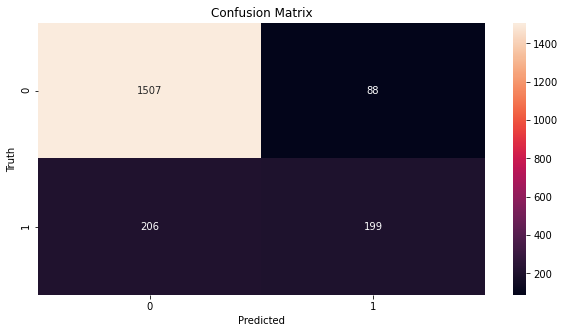

In [61]:
#Confusion matrix

import seaborn as sns

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [62]:
#Accuracy
round((1507+199)/(1507+199+88+206), 2)

0.85

In [65]:
#Precison for 0 class i.e. for those who didn't exit

round(1507/(1507+206), 2)


0.88

In [67]:
#Precison for 1 class i.e. for those who did exit

round(199/(88+199), 2)

0.69

In [68]:
#Recall for class 0
round(1507/(1507+88), 2)

0.94

In [69]:
#Recall for class 1
round(199/(206+199), 2)

0.49